# Nombre: Luis Ricardo Tun Aguilar
# Carnet: 22003085


# Proyecto No. 1


## 1. Crear un entorno de anaconda con los paquetes que considere necesarios.


## Entorno creado con el comando

conda create --name proyecto_env python=3.11

## Las librerías necesarias fueron instaladas con los comandos

conda install matplotlib 

conda install seaborn 

conda install numpy 

conda install pandas 

conda install scikit-learn

## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).


In [1]:
# Importa las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define el directorio de los datos a trabajar
path_data = "/Users/luistun/Maestria/curso_ciencia_datos_python/proyecto_data/"

In [3]:
# Carga el archivo
datos = np.load(path_data + 'proyecto_training_data.npy')

In [4]:
# Visualiza los datos
datos

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [5]:
# Obtener la dimensión de datos
datos.shape

(1460, 6)

In [6]:
# Calcula el índice que representa el 80% de las filas
indice_80_por_ciento = int(0.8 * datos.shape[0])

In [7]:
# Divide los datos en conjuntos de entrenamiento y validación
set_de_entrenamiento = datos[:indice_80_por_ciento, :]
set_de_validacion = datos[indice_80_por_ciento:, :]

## Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
    * media
    
    * valor máximo
    
    * valor mı́nimo
    
    * rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
    
    * desviación estándar

In [10]:
# Obteniendo el shape del set de entrenamiento
set_de_entrenamiento.shape

(1168, 6)

In [13]:
# Calcula la media de cada variable
medias_por_variable = np.nanmean(set_de_entrenamiento, axis=0)

In [15]:
# Visualizando medias por variable
print(medias_por_variable)

[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


In [16]:
# Calcula el máximo de cada variable
maximo_por_variable = np.nanmax(set_de_entrenamiento, axis=0)

In [17]:
# Visualizando máximos por variable
print(maximo_por_variable)

[7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]


In [18]:
# Calcula el mínimo por variable
minimo_por_variable = np.nanmean(set_de_entrenamiento, axis=0)

In [19]:
# Visualizando mínimos por variable
print(minimo_por_variable)

[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


In [23]:
# Calcula el rango de cada variable
rango_por_variable = np.nanmax(set_de_entrenamiento, axis=0) - np.nanmin(set_de_entrenamiento, axis=0)

In [24]:
# Visualizando el rango (peak to peak) por variable
print(rango_por_variable)

[7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]


In [25]:
# Calcula la desviación estándar de cada variable
desviacion_estandar_por_variable = np.nanstd(set_de_entrenamiento, axis=0)

In [26]:
# Visualizando la desviación estándar por variable
print(desviacion_estandar_por_variable)

[7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


## Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.


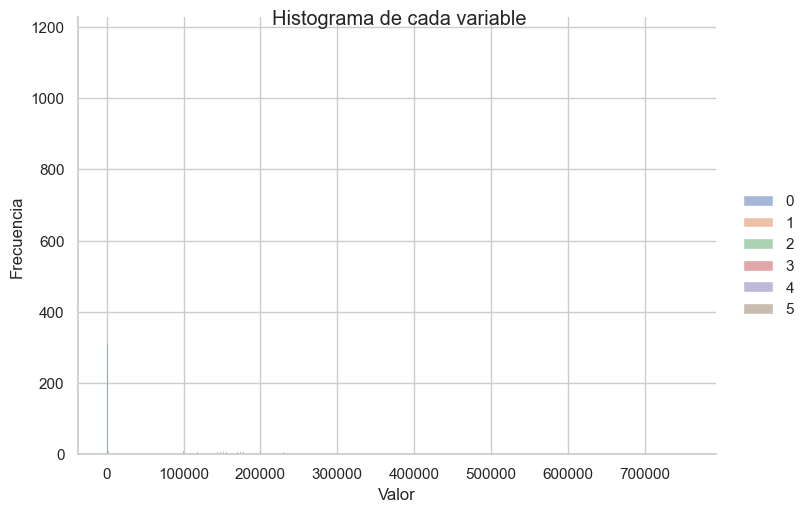

In [31]:
# Configura el estilo de las gráficas
sns.set(style="whitegrid")

# Crea un objeto de tipo FacetGrid utilizando displot
g = sns.displot(data=set_de_entrenamiento, kind="hist", kde=False, height=5, aspect=1.5)

# Añade etiquetas y título
g.set_axis_labels(x_var='Valor', y_var='Frecuencia')
g.fig.suptitle('Histograma de cada variable')

# Muestra la gráfica
plt.show()